In [4]:
# %% Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
# %% Load the dataset
data = pd.read_csv('dataset\Fertilizer Prediction.csv')
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (99, 9)
   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


In [7]:
data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

data.dropna(inplace=True)

# Separate features and target
X = data.drop('Fertilizer Name', axis=1)
y = data['Fertilizer Name']

# If the target is categorical, encode it
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Missing values in each column:
 Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [9]:
# %% Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (79, 8)
Test set shape: (20, 8)


In [10]:
# Identify categorical columns in X
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data using the encoded features
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Now train the model
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    colsample_bytree=0.6,
    gamma=0,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1,
    reg_alpha=0,
    reg_lambda=1,
    subsample=0.6
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Categorical columns to encode: ['Soil Type', 'Crop Type']


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:35:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



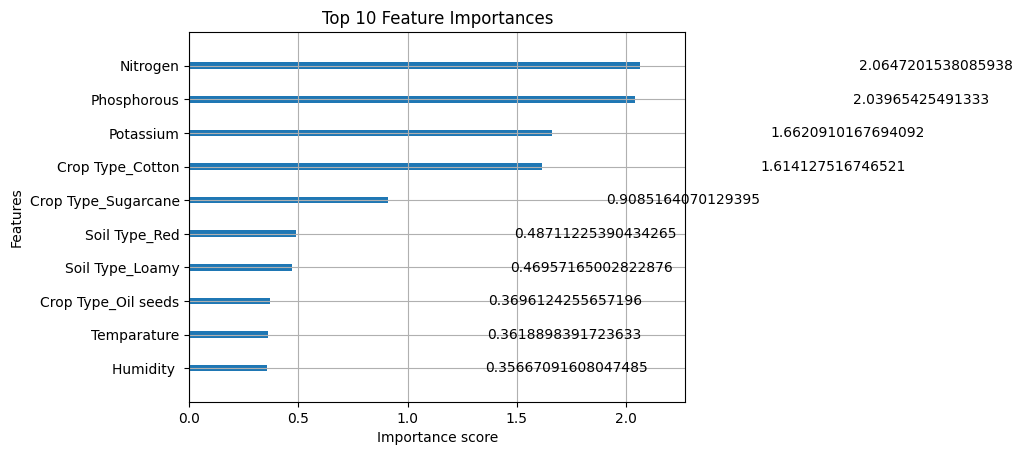

In [11]:
# %% Model Evaluation
# Calculate accuracy and print a classification report
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Optional: Plotting feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances')
plt.show()


In [9]:
#from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
#
## Define the parameter grid for fine-tuning
#param_grid = {
#    'max_depth': [3, 5, 7],               # Lower max_depth helps to reduce overfitting
#    'min_child_weight': [1, 3, 5],        # Higher value can make the model more conservative
#    'gamma': [0, 0.1, 0.3, 0.5],          # Increasing gamma can reduce model complexity
#    'learning_rate': [0.01, 0.05, 0.1],   # Lower learning_rate can improve generalization
#    'subsample': [0.6, 0.8, 1.0],         # Row subsampling to prevent overfitting
#    'colsample_bytree': [0.6, 0.8, 1.0],  # Column subsampling to prevent overfitting
#    'reg_alpha': [0, 0.01, 0.1],          # L1 regularization term on weights
#    'reg_lambda': [1, 1.5, 2]             # L2 regularization term on weights
#}
#
## Initialize the base model
#xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
#
## Set up GridSearchCV with cross-validation
#grid_search = GridSearchCV(
#    estimator=xgb_model,
#    param_grid=param_grid,
#    scoring='accuracy',    # You can choose another metric if needed
#    cv=5,                  # 5-fold cross-validation
#    verbose=1,
#    n_jobs=-1              # Use all available cores
#)
#
## Run grid search on the training data
#grid_search.fit(X_train, y_train)
#
## Print the best parameters and best score from grid search
#print("Best Parameters:", grid_search.best_params_)
#print("Best Cross-validation Score: {:.2f}%".format(grid_search.best_score_ * 100))
#
## Use the best model found to make predictions on the test set
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_test)
#
## Evaluate the best model performance on the test set
#from sklearn.metrics import classification_report, accuracy_score
#accuracy = accuracy_score(y_test, y_pred)
#print("\nTest Accuracy: {:.2f}%".format(accuracy * 100))
#print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.6}
Best Cross-validation Score: 98.75%

In [12]:
import joblib

# Save the best model to a file
#joblib.dump(model, 'xgb_best_model.pkl')
print("Model saved as 'xgb_best_model.pkl'")
#joblib.dump(le, "fert_le.pkl")
print("Label Encoder saved as 'model/fert_le.pkl'")
# To load the model later, you can use:
# loaded_model = joblib.load('xgb_best_model.pkl')


Model saved as 'xgb_best_model.pkl'
Label Encoder saved as 'model/fert_le.pkl'


In [16]:
# After one-hot encoding your training data:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
fert_columns = list(X_encoded.columns)
joblib.dump(fert_columns, "fert_columns.pkl")
print("Fertilizer columns saved as 'model/fert_columns.pkl'")


Fertilizer columns saved as 'model/fert_columns.pkl'


In [13]:
from sklearn.model_selection import cross_validate
import numpy as np

# Define the scoring metrics you want to evaluate
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Perform 5-fold cross-validation on the entire encoded dataset
cv_results = cross_validate(model, X_encoded, y_encoded, cv=5, scoring=scoring)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f}%".format(np.mean(cv_results['test_accuracy']) * 100))
print("Precision: {:.2f}%".format(np.mean(cv_results['test_precision_macro']) * 100))
print("Recall: {:.2f}%".format(np.mean(cv_results['test_recall_macro']) * 100))
print("F1 Score: {:.2f}%".format(np.mean(cv_results['test_f1_macro']) * 100))


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost

Cross-Validation Results:
Accuracy: 99.00%
Precision: 96.43%
Recall: 97.14%
F1 Score: 96.73%


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
